
# Comparasion of Different Canonical Coordinates
## Author
Brandon Behring

W


In [1]:
using DifferentialEquations
using PyCall
# pygui(:qt)
using PyPlot
# pygui(true);
H=.2
Yfind(h)=sqrt(h/(2h+1));


In [2]:
# function condition(u,t,integrator) # Event when event_f(u,t) == 0
#  u[3]
# end

# function affect!(integrator)
# end

# cb2= ContinuousCallback(condition, affect!);

In [3]:
Y=Yfind(H);t_end=1000.0;
q0,p0=[zeros(2) for i in 1:2];
q0[1]=0.; 
q0[2]=0.; 
p0[1]=Y+1e-3; 
p0[2]=Y
Hamiltonian_Dimer(q0,p0,1)

UndefVarError: UndefVarError: Hamiltonian_Dimer not defined

In [4]:
# H0(p,q)= -log(q[1]^2+p[1]^2)-log(q[2]^2+p[2]^2)
# H1(p,q)=log(2-2sqrt(2)*(p[1]+p[2])+(p[1]+p[2])^2+(q[1]-q[2])^2 )
# H2(p,q)=log(2+2sqrt(2)*(p[1]+p[2])+(p[1]+p[2])^2+(q[1]-q[2])^2 )
# H3(p,q)=log(2-2sqrt(2)*(p[1]+p[2])+(p[1]-p[2])^2+(q[1]+q[2])^2 )
# H4(p,q)=log(2+2sqrt(2)*(p[1]+p[2])+(p[1]-p[2])^2+(q[1]+q[2])^2 )
# Hamiltonian_Dimer(p,q)=1/(8pi)*(H0(p,q)+H1(p,q)+H2(p,q)+H3(p,q)+H4(p,q));

In [5]:
Hamiltonian_Dimer(q,p,t)=4sqrt(abs( (q[1]^2+p[1]^2)*(q[2]^2+p[2]^2) )/
(
        (2-2sqrt(2)*(p[1]+p[2])+(p[1]+p[2])^2+(q[1]-q[2])^2 )*
        (2+2sqrt(2)*(p[1]+p[2])+(p[1]+p[2])^2+(q[1]-q[2])^2 )*
        (2-2sqrt(2)*(p[1]-p[2])+(p[1]-p[2])^2+(q[1]+q[2])^2 )*
        (2+2sqrt(2)*(p[1]-p[2])+(p[1]-p[2])^2+(q[1]+q[2])^2 )

));
Hamiltonian_Dimer(q0,p0,0.)

0.20074183623668707

In [6]:
prob= HamiltonianProblem{true}(Hamiltonian_Dimer, q0, p0, (0., t_end));
@time t,A=solve(prob, Vern9(),reltol=1e-13,abstol=1e-15,maxiters=1e15);

 33.252228 seconds (92.80 M allocations: 3.638 GiB, 11.34% gc time)


In [7]:
q1=A[1,:]
q2=A[2,:]
p1=A[3,:]
p2=A[4,:];

In [8]:
Q1=(q1+q2)/sqrt(2)
Q2=(q1-q2)/sqrt(2)
P1=(p1+p2)/sqrt(2)
P2=(p1-p2)/sqrt(2);

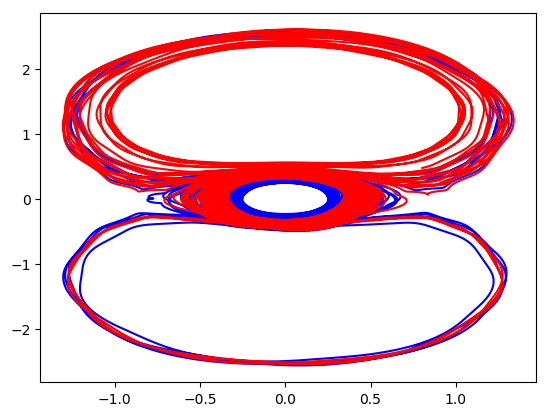

In [9]:
plot(q1,p1,"b")
plot(q2,p2,"r");

In [10]:
figure()

Figure(PyObject <Figure size 640x480 with 0 Axes>)

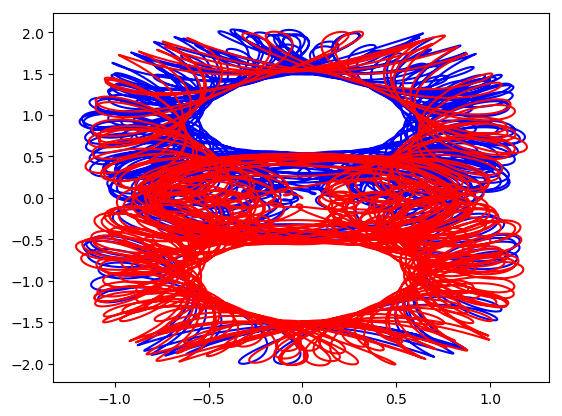

In [11]:
plot(Q1,P1,"b")
plot(Q2,P2,"r");

In [12]:
condition_max_hits(u,t,integrator)= u[5]>max_hit || maximum([abs(u[1]),abs(u[2]),abs(u[3]),abs(u[4])])>barrier
affect_stop!(integrator) = terminate!(integrator)
function condition_hits_PSS(u,t,integrator) # Event when event_f(u,t) == 0
   u[1]-u[3]
end
function affect_update_iterator!(integrator)
    integrator.u[5]=integrator.u[5]+1
end

affect_update_iterator! (generic function with 1 method)

In [13]:
P2[1]*sqrt(2)

0.0010000000000000009

In [14]:
sqrt(10)/10

0.31622776601683794

In [15]:
Yfind1(0,0,H)

UndefVarError: UndefVarError: Yfind1 not defined